# Random Forest x IRIS 

In [1]:
import numpy as np
import pandas as pd
#autres
import sklearn as skl
from sklearn.metrics import accuracy_score
import seaborn as sns


### Importer le dataset IRIS 

In [2]:
iris=pd.read_csv('iris.csv')


### Faite un dataFrame et renommer les colonnes 

In [3]:
iris=iris.rename(columns={iris.columns[0] : 'sepal length (cm)', iris.columns[1] : 'sepal width (cm)', 
                          iris.columns[2] : 'petal length (cm)', iris.columns[3] : 'petal width (cm)'})


print(iris.shape)
iris.head()

# iris=pd.DataFrame(load_iris())

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Définir les variables features et la target & effectuer un split 

In [4]:
from sklearn.model_selection import train_test_split
features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target=['species']
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(iris[features], 
                                                                        iris[target], test_size=0.2)

### Entrainer le classifieur 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


clf=RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=42)

### Afficher l'accuracy de votre classifieurs 

In [6]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

### Analyser votre classifieur, que voyez vous ? 

<AxesSubplot:>

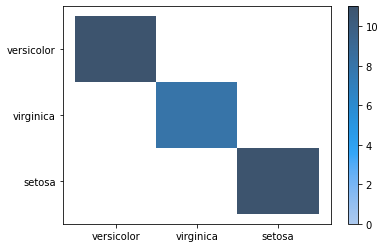

In [7]:
sns.histplot(x=y_test.values.ravel(), y=y_pred, cbar=True)

On a une bonne corrélation, avec seulement quelques éléments dans la mauvaise classe.

### Afficher les features importances

In [8]:
clf.feature_importances_

array([0.1262348 , 0.00120209, 0.43683845, 0.43572467])

La seconde 'feature' n'a quasiment pas d'importance, et la première en a également relativement peu.

### Afficher graphiquement les features importances  

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

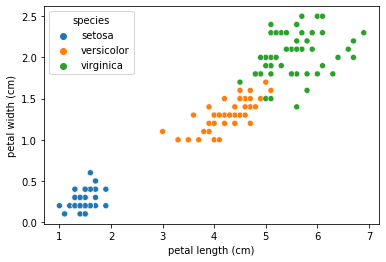

In [9]:
#On trace les seux valeurs les plus importantes sur une figure en 2D :
sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)', hue='species')

### Entrainer votre classifieurs avec moins de features

In [10]:
features=['petal length (cm)', 'petal width (cm)']
target=['species']
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(iris[features], 
                                                                        iris[target], test_size=0.2)

clf3=RandomForestClassifier(max_depth=2, random_state=42)

clf3.fit(x_train, y_train.values.ravel())

y_pred = clf3.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [11]:
features=['petal length (cm)']
target=['species']
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(iris[features], 
                                                                        iris[target], test_size=0.2)

clf4=RandomForestClassifier(max_depth=2, random_state=42)

clf4.fit(x_train, y_train.values.ravel())

y_pred = clf4.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

In [12]:
features=['sepal length (cm)']
target=['species']
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(iris[features], 
                                                                        iris[target], test_size=0.2)

clf5=RandomForestClassifier(max_depth=2, random_state=42)

clf5.fit(x_train, y_train.values.ravel())

y_pred = clf5.predict(x_test)
accuracy_score(y_test, y_pred)

0.7

### Que constatez vous ? 

La classification fonctionne correctement même avec très peu de features du moment que les features ont une assez forte importance. 

D'autant plus qu'il y a une variation de l'accuracy score de l'ordre de 0.1 en relançant le même calcul (du fait de l'aléatoire dans les split et fit), donc la différence entre le cas où on utilise 'petal length' seul et celui ou on utilise aussi 'petal width' est peu significative.

à noter que j'ai relancé une dernière fois le classeur avant de le mettre sur git, donc je n'ai pas toujours eu cette baisse systématique du score d'accuracy